<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/BEGAN_Boundary_Equilibrium_Generative_Adversarial_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BEGAN: Boundary Equilibrium Generative Adversarial Networks**

논문 링크: https://arxiv.org/abs/1703.10717

본 논문은 WGAN과 EBGAN에서 얻은 아이디어와 지금까지 개발된 테크닉을 활용한 BEGAN을 제안한다. 본 논문의 contribute는 다음과 같은데,

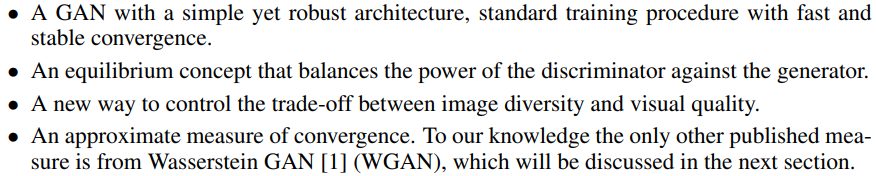

해석하자면,

- 단순하지만 강력한 구조와 빠르고 안정적인 학습과 수렴이 가능한 GAN
- Discriminator와 generator 사이의 균형을 조정해주는 equilibrium contept
- 이미지의 다양성과 질(quality) 사이의 trade-off를 조정하는 것이 가능한 새로운 방법
- "수렴"의 approximate measure 

위와 같다.

## **BEGAN 구조**

먼저 BEGAN의 경우 EBGAN과 구조가 상당히 유사한데, EBGAN이 discriminator에 auto-encoder를 사용한 것과 마찬가지로 BEGAN도 auto-encoder를 이용한다. 하지만, 중요한 다른 점이 있다. 바로, GAN이 data distribution을 맞추기 위해 학습하는 반면에 **BEGAN은 auto-encoder loss distribution을 맞추려한다는 점**이다. 이때, Wasserstein distance를 사용한다는 점도 per-pixel Euclidean distance를 사용하는 EBGAN과 다른 점이다.

방금 언급했듯이 BEGAN은 loss distribution에 포커스를 맞춘다했는데, 이를 통해 어떤 다른 점이 생기는지 알아보겠다.

먼저 살펴봐야할 부분은 loss의 분포에 관한 내용이다. pixel-wise loss 혹은 error들이 서로 independant하고 identically distributed라고 할 때, 중심극한정리(Central Limit Theorem)에 의해 image-wise loss는 정규분포를 따른다고 근사할 수 있다.

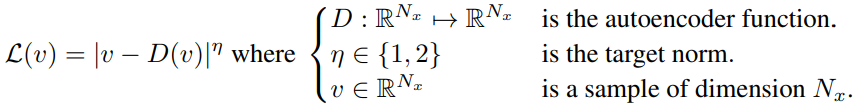

위에서 설명한 것들을 수식으로 나타내면 위와 같다. 이때, L: R^(N_x) ↦ R^+가 pixel-wise auto-encoder loss이다.

다시 정리하자면, 위의 식은 auto-encoder를 통해 나온 결과값과 data sample의 distribution 사이의 차이를 계산하여 auto-encoder의 loss를 계산하는 것이다. 

BEGAN에서는 η=1 로 L1 norm을 사용하여 image와 auto-encoder로 복원된 image 사이의 loss를 계산하였다.

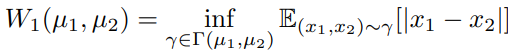

두 정규분포 μ_1=N(m_1,C_z)와 μ_2=N(m_2,C_z)에서 각각의 평균과 분산이 m_(1,2) ∈ R^p, C_(1,2) ∈ R^(p×p) 일 때, squared Wasserstein distance는 위와 같다.

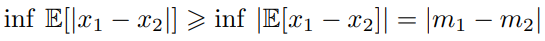

Wassetstein distance는 gan에서 loss를 계산하는 한 가지 방식이다.

위에서 말하는 auto-encoder 2개의 loss distribution은 generator를 통해 나온 sample의 auto-encoder loss 분포와 실제 data의 auto-encoder loss 분포이다. 이때, m_1과 m_2는 각각 평균을 의미하는데, 이 2개의 평균을 맞추는 것을 목표로 하면서 train이 진행이 되는 것이다.

이때, 나는 "**왜 평균을 맞추는 것이 2개의 분포를 맞추는 것일까?**" 이라는 의문이 들었다.

이에 대한 답은 위에서 언급한 부분에 있다. 바로 BEGAN에서는 pixel-wise로 각각의 pixel의 차이를 계산하고 그 결과를 전체로 합하여 loss를 계산한다. 그러면 각각의 loss의 합은 평균과 비슷하게 생각할 수 있으며, 그 결과 중심극한정리에 따라 정규분포를 따르게 되는 것이다. 2개의 분포가 정규분포를 따른다고 가정을 할 수 있으므로, 평균을 맞추면 두 loss의 분포가 같아지는 것이다.

### **GAN objective**

위에서 언급했듯이 본 논문에서는 2개의 loss distribution을 활용해 이 차이를 줄여 실제와 같은 data를 만들어낼려고 한다.

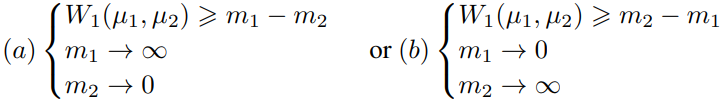

따라서, loss의 분포를 맞추기 위해 M1 - M2의 절대값을 최대화 해야한다. 위의 식과 같이 총 2가지의 방법이 있다. (이때, 위의 식에서 m1이 실제 data의 loss 분포 평균이며, m2가 generator가 생성한 data의 loss 분포 평균이다.)

본 논문의 저자는 (b) 방법을 선택하였는데, 그 이유는 **실제 image의 auto-encoder loss를 줄이는 것이 실제 image를 auto-encoding하는 것으로 이어지기 때문**이라고 한다.

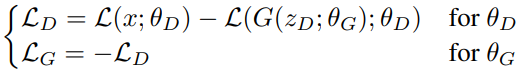

결론적으로 위의 식이 loss function이 된다.

먼저, 위 식에서 x는 실제 image, z는 input vector이다.

discriminator의 입장에서 보면, 실제 image에 대한 auto-encoder loss를 감소시키고 z로 생성한 sample image에 대한 auto-encoder loss는 증가시키려고 한다.

반대로 generator 입장은 실제와 비슷한 sample을 만들기 위해 학습한다.

위의 식은 WGAN과 유사하지만, **BEGAN이 정규분포를 따른다고 가정한 loss들 간의 분포를 맞출려 한다**는 점과 **Wasserstein distance를 사용하는 함수를 단수화했기에 더 이상 discriminator가 K-Lipschitz가 될 필요가 없다**는 점이 다르다.

### **Equilibrium**

GAN에서는 generator와 discriminator가 균형을 맞추어 학습하는 것이 매우 중요하다. (이러한 이유로 ProgressiveGAN 등의 구조가 균형을 이루는 것이다.) 하지만, discriminator가 generator를 이기기 쉽다. 

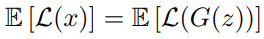

위의 식은 균형이 딱 맞을 때의 equilibrium이다. 생성된 sample이 진짜 image와 구별이 되지 않기 위해선 error도 당연히 비슷해야한다. 즉, 평균이 같아야 한다. 이 개념을 잘 이용하면 한 쪽이 다른 쪽을 완전 이기지 못하고 균형을 잡을 수 있도록 조절할 수 있는데,

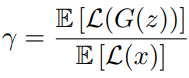

본 논문에서는 "loss의 평균이 같아지는 것이 두 loss 분포가 같아지는 것과 같다."라는 개념으로부터 generator와 discriminator의 균형을 맞추려고 한다. 이를 위해 제시한 것이 바로 위의 hyper-parameter γ[0,1]이다.

discriminator의 2가지 목표인 실제 image를 auto-encoding하는 것과 sample image와 실제 image를 분류하는 것을 γ이 균형을 맞춰준다.

**γ가 낮아지면 실제 image의 auto-encoding에 집중하게 되어 generator가 다양한 image를 생성하지 못하게 만든다. 반대로 γ가 높아지면, 실제 image의 auto-encoding에 집중되어 generator가 다양한 image를 생성하지 못하게 만든다.** 결론적으로 이 γ를 활용해 두 네트워크 사이의 균형을 조절하는 것이다.

### **Boundary Equilibrium GAN**

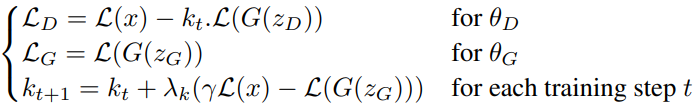

위의 식이 앞서 설명한 loss와 equilibrium을 도입한 BEGAN의 최종적인 모습이다.

새로운 변수인 k_t가 등장했는데, 이 변수는 generator가 생성한 image에 대한 loss를 고려하는 정도이다. 처음에 0으로 시작해 0.0001로 점차 증가해 나간다. 단순히 learning rate로 생각하면 편하다. 아무튼, 이것을 넣어줌으로써 train 초반에 discriminator가 generator에 의해 생성된 image의 loss를 적게 고려해, generator가 다양한 image를 생성할 수 있게끔 한다. 또한, discriminator의 입장에서도 초반에 실제 image의 auto-encoding에 더욱 집중을 할 수 있다.

### **Convergence measure**

해당 파트는 본 논문의 저자가 장점이라고 주장하는 부분이다. 기존 GAN은 분포를 맞춰가며 GAN이 수렴한 것을 직접 image를 생성시켜 보면서 확인할 수 밖에 없었다. 하지만, equilibruim 개념을 가져와 이를 확인할 수 있는 방법을 제시했다.

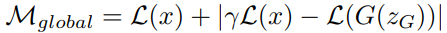

위의 식을 통해 실제 loss와 sample image loss의 차이와 실제 image의 auto-encoding 정도를 통해 모델이 잘 train했는지 혹은 mode collapse에 빠졌는지를 확인할 수 있다고 한다.

### **Architecture**

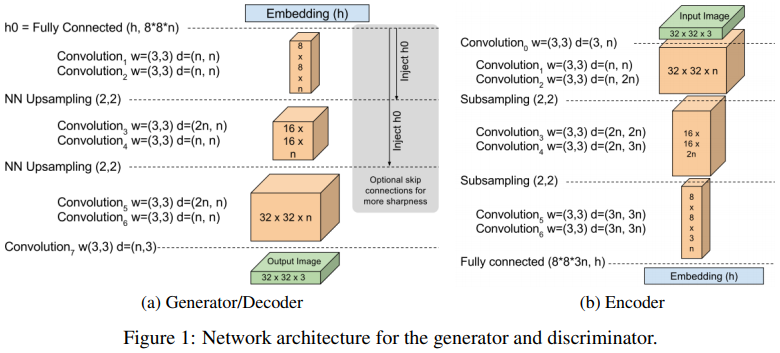

model의 구조같은 경우는 위의 그림 Figure 1과 같이 BN이나 dropout, transpose convolution, exponential gwoth for convolution filter등을 사용하지 않고 만들어서 매우 단순하다.

gradient propagation을 위해 skip-connection을 이용한 것 외에는 크게 특별한 점이 없다.

## **Experiments**

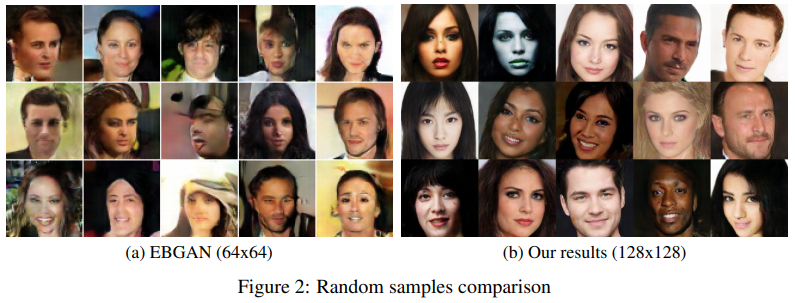

위의 그림 Figure 2를 보면 (a) 부분의 EBGAN에 비해 (b) 부분의 BEGAN이 월등한 성능을 보여준다. 비록 완전히 선명하진 않지만 일관성있는 성능을 보여주는 것을 알 수 있다.

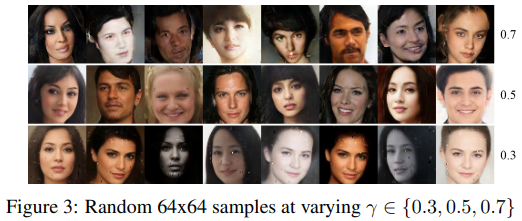

위의 그림 Figure 3은 위의 Equilibrium 파트에서 언급한 γ에 따른 결과를 보여준다. γ이 낮을 때는 퀄리티가 좋지만 얼굴이 일관되게 보이는 반면, γ이 높은 경우는 다양성이 증가하지만 인공적인 느낌을 준다.

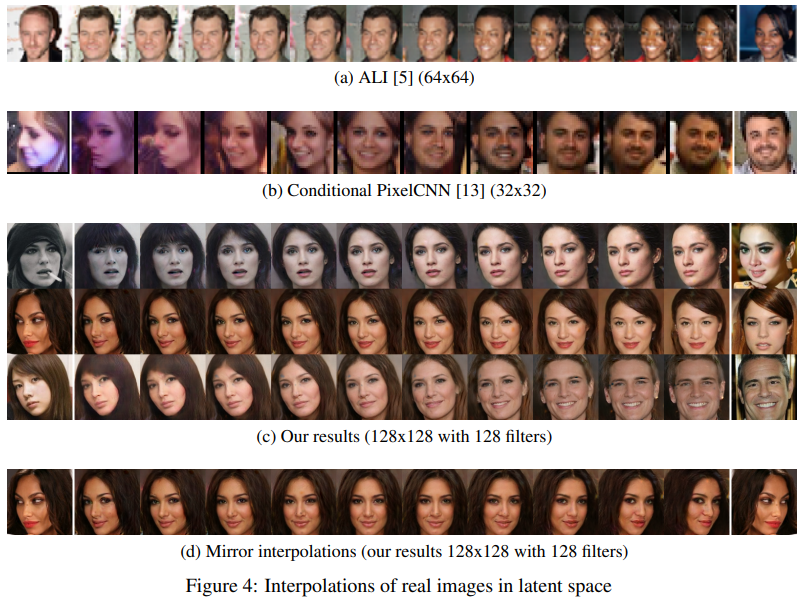

위의 그림 Figure 4에서는 생성 model로써 GAN이 단순 기억에 따라 만들었는지 아니면 이해를 하고 image를 생성했는지 보여주기 위해 z vector 사이에 interpolation을 통해 생성된 image를 보여준 것이다.

처음과 마지막의 image는 실제 image이며, 중간 image들이 모두 interpolation을 통해 만들어진 image들인데, 이를 통해 model이 단순 기억을 통해 만들어진 것이 아님을 확인할 수 있다.

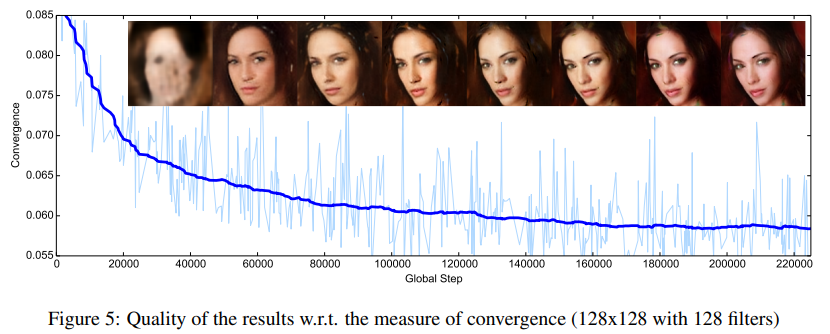

위의 그림 Figure 5는 균형을 얼마나 잘 유지하는지 확인하기 위하여 한쪽이 더 학습되도록 한 후 얼마나 안정적으로 작동하는지를 확인한 것이다.

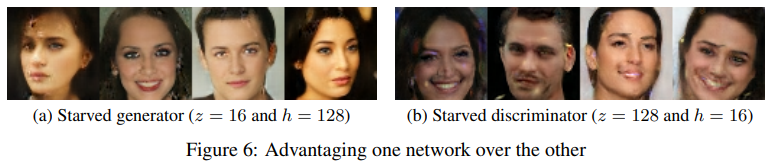

마지막으로 위의 그림 Figure 6에서는 균형을 얼마나 잘 유지하는지 확인하기 위해 한 쪽에 가중치를 더 주고 결과를 확인한 것이다. 확실히 equilibrium 덕분에 한 쪽에 가중치를 더 주어도 안정적으로 학습이 된다.